In [ ]:
# import tensorflow as tf
# from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np  
import os

In [ ]:
# Constant important to our dataset
image_size = 256  # All this images is with this size
batch_size = 32  # Like a industry standard

In [6]:
# We import our images dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "data",
    shuffle = True,
    image_size = (image_size, image_size),  # Weight * High
    batch_size = batch_size
)

Found 2152 files belonging to 3 classes.


In [11]:
class_names = dataset.class_names
len(dataset)  # The length of the dataset is 68 because we split in 32 batch, to divide all 2152 images in 32 batch, is almost 68 batches

68

Images like a tf tensor of color scales
[[[174. 165. 168.]
  [173. 164. 167.]
  [172. 163. 166.]
  ...
  [153. 142. 148.]
  [155. 144. 150.]
  [157. 146. 152.]]

 [[174. 165. 168.]
  [173. 164. 167.]
  [172. 163. 166.]
  ...
  [154. 143. 149.]
  [154. 143. 149.]
  [155. 144. 150.]]

 [[174. 165. 168.]
  [174. 165. 168.]
  [173. 164. 167.]
  ...
  [156. 145. 151.]
  [155. 144. 150.]
  [153. 142. 148.]]

 ...

 [[149. 135. 134.]
  [143. 129. 128.]
  [150. 136. 135.]
  ...
  [125. 113. 113.]
  [130. 118. 118.]
  [131. 119. 119.]]

 [[144. 130. 129.]
  [139. 125. 124.]
  [147. 133. 132.]
  ...
  [120. 108. 108.]
  [122. 110. 110.]
  [121. 109. 109.]]

 [[157. 143. 142.]
  [152. 138. 137.]
  [157. 143. 142.]
  ...
  [135. 123. 123.]
  [133. 121. 121.]
  [130. 118. 118.]]]
Image


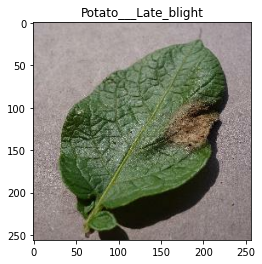

In [18]:
# The images are represented by pixels, each pixels has assigned a color between 0 - 255 and is read like a 3d numpy array with shape (Weight, High, 3)
for image_batch, label_batch in dataset.take(1):  # Here we are taking the first batch (with 32 images each one)
    print("Images like a tf tensor of color scales")
    print(image_batch[0].numpy())
    print("Image")
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])

In [22]:
# Split the dataset
# 80% ==> training
# 20% ==> 10% validation - 10% test
train_size = 0.8
train_ds = dataset.take(int(train_size * len(dataset)))
rest_ds = dataset.skip(len(train_ds))
valida_size = 0.1
valida_ds = rest_ds.take(int(len(dataset) * valida_size))
test_ds = rest_ds.skip(len(valida_ds))


In [25]:
# Study this - is something with GPU
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
valida_ds = valida_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)


In [30]:
# Scale the data on the images - From RGB scale (0 - 255) to 0 - 1 scale (this is a layer to add to the final model)
resize_scale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_size, image_size),  # To ensure that the all inputs images are in the same scale
    layers.experimental.preprocessing.Rescaling(1.0/(image_size - 1))
])

In [31]:
# Do data augmentation to strengthen the model (is only for training), for this problem only we are going to flip and rotate the images
# Is a layer too
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])


In [32]:
# Model creation - Convolutions neural networks
classes = 3
input_shape = (batch_size, image_size, image_size, classes)

model = models.Sequential([
    resize_scale,
    data_augmentation,
    layers.Conv2D(filters = batch_size, kernel_size = (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(classes, activation = 'softmax')
])

model.build(input_shape = input_shape)

In [34]:
# We compile the model
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [36]:
# We train the model
history_model = model.fit(
    train_ds,
    epochs = 10,
    batch_size = batch_size,
    verbose = 1,
    validation_data = valida_ds
)

Epoch 1/10
54/54 [==============================] - 110s 2s/step - loss: 0.2721 - accuracy: 0.8981 - val_loss: 0.2655 - val_accuracy: 0.9010
Epoch 2/10
54/54 [==============================] - 101s 2s/step - loss: 0.2142 - accuracy: 0.9167 - val_loss: 0.2727 - val_accuracy: 0.9062
Epoch 3/10
54/54 [==============================] - 101s 2s/step - loss: 0.1923 - accuracy: 0.9265 - val_loss: 0.2449 - val_accuracy: 0.8906
Epoch 4/10
54/54 [==============================] - 101s 2s/step - loss: 0.2058 - accuracy: 0.9242 - val_loss: 0.2262 - val_accuracy: 0.8854
Epoch 5/10
54/54 [==============================] - 101s 2s/step - loss: 0.1487 - accuracy: 0.9404 - val_loss: 0.2117 - val_accuracy: 0.9271
Epoch 6/10
54/54 [==============================] - 151s 3s/step - loss: 0.1634 - accuracy: 0.9358 - val_loss: 0.2976 - val_accuracy: 0.8646
Epoch 7/10
54/54 [==============================] - 164s 3s/step - loss: 0.1447 - accuracy: 0.9410 - val_loss: 0.2928 - val_accuracy: 0.8854
Epoch 8/10
54

In [37]:
model.evaluate(test_ds)

8/8 [==============================] - 4s 330ms/step - loss: 0.2765 - accuracy: 0.9052


[0.27645188570022583, 0.9051724076271057]

In [38]:
accuracy = history_model.history['accuracy']
valida_accuracy = history_model.history['val_accuracy']
loss = history_model.history['loss']
valida_loss = history_model.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

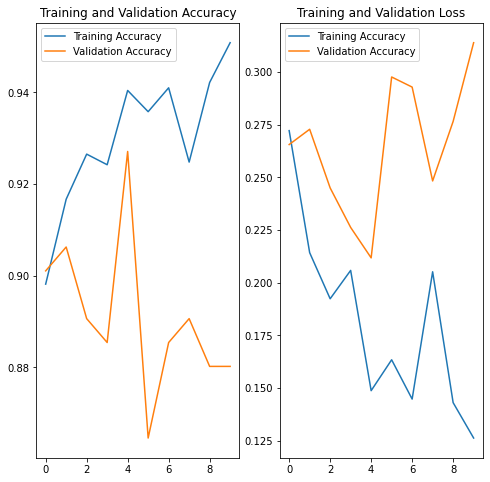

In [41]:
# We plot the history of the training
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(10), accuracy, label = 'Training Accuracy')
plt.plot(range(10), valida_accuracy, label = 'Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label = 'Training Accuracy')
plt.plot(range(10), valida_loss, label = 'Validation Accuracy')
plt.legend()
plt.title('Training and Validation Loss')

First image to predict
Actual label = Potato___Late_blight

Prediction
1/1 [==============================] - 0s 377ms/step
[0.00463994 0.94891804 0.046442  ]
Predicted label: Potato___Late_blight


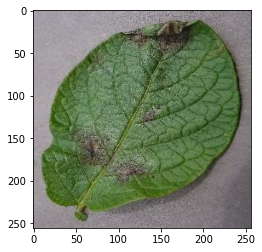

In [48]:
# First predictions and model evaluation with examples
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0]

    print('First image to predict')
    plt.imshow(first_image)
    print('Actual label =', class_names[first_label])
    print("")
    print("Prediction")
    batch_prediction = model.predict(image_batch)
    print(batch_prediction[0]) # Here we have the probabilities to belong each class
    print("Predicted label:", class_names[np.argmax(batch_prediction[0])])

In [62]:
def predict(model, images):
    img_array = tf.keras.preprocessing.image.img_to_array(images) # To convert the images into RGB scale tensor
    img_array = tf.expand_dims(img_array, 0) # To create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 48ms/step


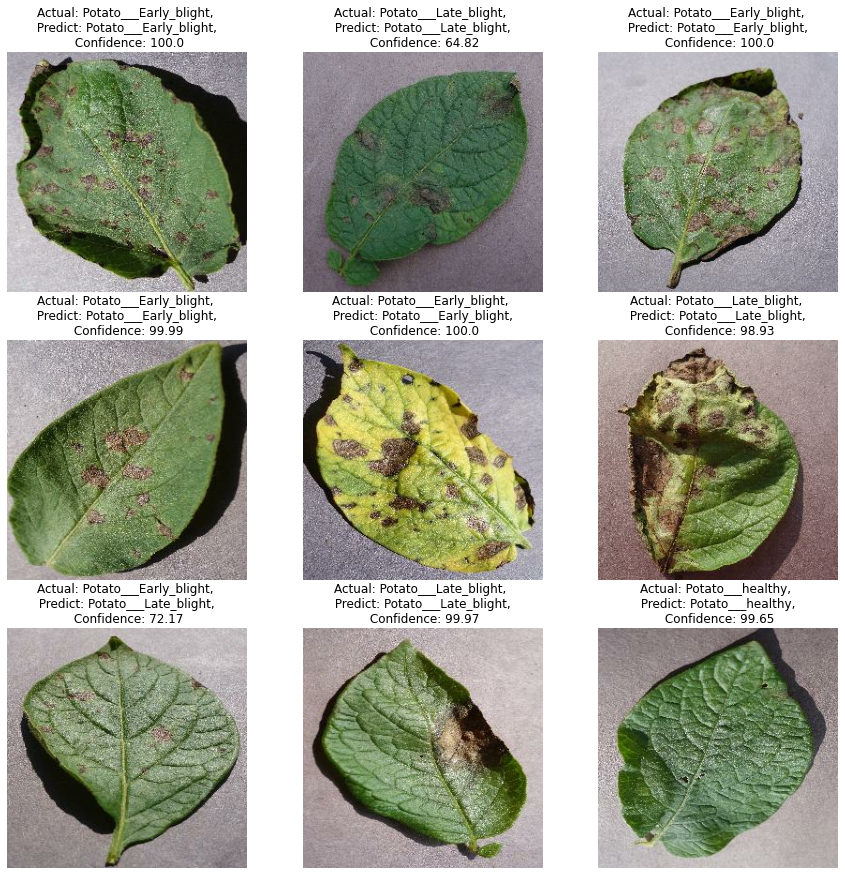

In [65]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title("Actual: {}, \n Predict: {}, \n Confidence: {}".format(actual_class, predicted_class, confidence))
        plt.axis("off")

In [83]:
# Save model
current_version = max([int(i[8]) for i in os.listdir('models')])
model_version = 'Version {}'.format(current_version + 1)
model.save(f"models/{model_version}")


INFO:tensorflow:Assets written to: models/Version 2\assets


INFO:tensorflow:Assets written to: models/Version 2\assets


In [ ]:
#Load model
filepath = r'C:\Users\Asus\Data-Science---Projects\Deep Learning\Potato diseases\models\Version 1'
model_load = tf.keras.models.load_model(
    filepath, custom_objects=None, compile=True, options=None
)